<a href="https://colab.research.google.com/github/ankesh86/RecommendationSystems/blob/main/Clustering_based_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Collection**

In [2]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

import seaborn as sns
import os

from sklearn import preprocessing

In [3]:
df_order = pd.read_excel("Rec_sys_data.xlsx")

#read customer dataset
df_customer = pd.read_excel("Rec_sys_data.xlsx", sheet_name='customer')

df_product = pd.read_excel("Rec_sys_data.xlsx", sheet_name='product')

In [4]:
#viewing top 5 rows
print(df_order.head())
print(df_customer.head())
print(df_product.head())


   InvoiceNo StockCode  Quantity         InvoiceDate        DeliveryDate  \
0     536365    84029E         6 2010-12-01 08:26:00 2010-12-02 08:26:00   
1     536365     71053         6 2010-12-01 08:26:00 2010-12-02 08:26:00   
2     536365     21730         6 2010-12-01 08:26:00 2010-12-03 08:26:00   
3     536365    84406B         8 2010-12-01 08:26:00 2010-12-03 08:26:00   
4     536365     22752         2 2010-12-01 08:26:00 2010-12-04 08:26:00   

   Discount%        ShipMode  ShippingCost  CustomerID  
0       0.20      ExpressAir         30.12       17850  
1       0.21      ExpressAir         30.12       17850  
2       0.56     Regular Air         15.22       17850  
3       0.30     Regular Air         15.22       17850  
4       0.57  Delivery Truck          5.81       17850  
   CustomerID  Gender  Age  Income  Zipcode Customer Segment
0       13089    male   53    High     8625   Small Business
1       15810  female   22     Low    87797   Small Business
2       15556  fem

# **Pre-processing the data**

In [8]:
#function to check missing values
def missing_zero_values_table(df):
  zero_val = (df == 0.00).astype(int).sum(axis=0)
  mis_val = df.isnull().sum()
  mis_val_percent = 100*df.isnull().sum() / len(df)
  mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
  mz_table = mz_table.rename(
      columns={0: 'Zero Values', 1:'Missing Values', 2 : '% of total values'}
  )

  mz_table['Total Zero Missing values'] = mz_table['Zero Values'] +  mz_table['Missing Values']
  mz_table['% Total Zero Missing values'] = 100 * mz_table['Total Zero Missing values'] / len(df)

  mz_table['Data Type'] = df.dtypes
  mz_table = mz_table[
      mz_table.iloc[:,1] != 0].sort_values(
          '% of total values', ascending=False).round(1)
  print("Your selected dataframe has "+ str(df.shape[1]) + "columns and "+str(df.shape[0]) +"Rows.\n There are "+ str(mz_table.shape[0]) + " columns that have missing values.")

  mz_table.to_excel('missing_and_zero_values.xlsx', freeze_panes=(1,0), index=False)

  return mz_table


In [9]:
missing_zero_values_table(df_customer)

Your selected dataframe has 6columns and 4372Rows.
 There are 0 columns that have missing values.


,Zero Values,Missing Values,% of total values,Total Zero Missing values,% Total Zero Missing values,Data Type


# **EDA**

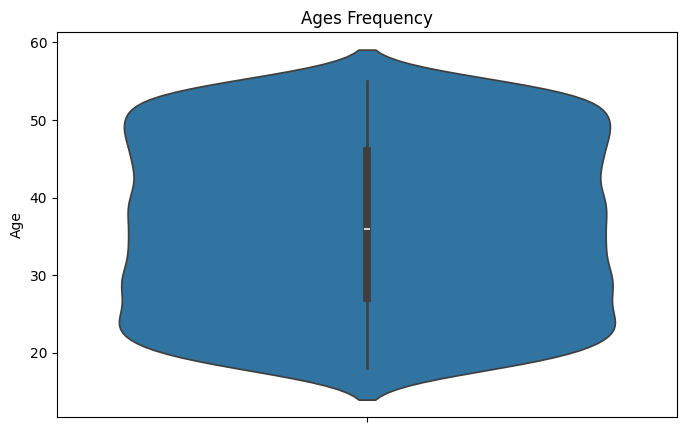

In [10]:
#count of age category
plt.figure(figsize=(8,5))
plt.title("Ages Frequency")
sns.axes_style("dark")
sns.violinplot(y=df_customer['Age'])
plt.show()

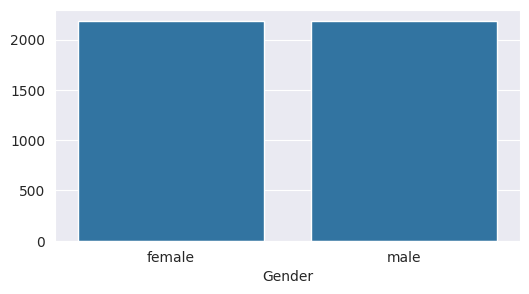

In [11]:
#count of gender
genders = df_customer.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(6,3))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

<ipython-input-12-bdd18b17a7cd>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, palette="rocket")


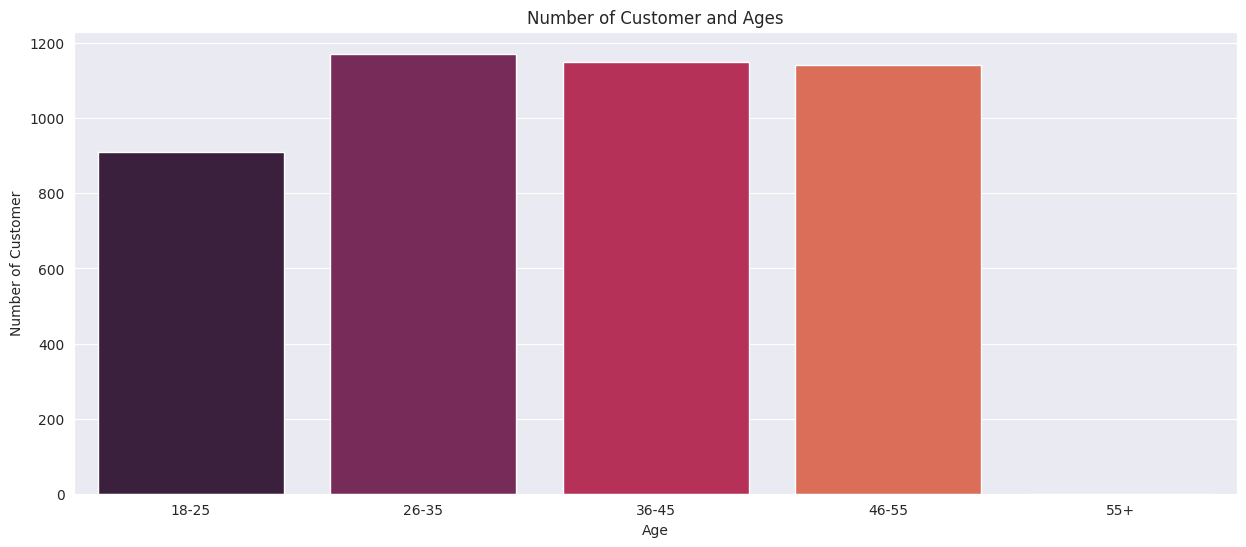

In [12]:
#age buckets agains number of customers
age18_25 = df_customer.Age[(df_customer.Age <= 25) & (df_customer.Age>= 18)]
age26_35 = df_customer.Age[(df_customer.Age <= 35) & (df_customer.Age>= 26)]
age36_45 = df_customer.Age[(df_customer.Age <= 45) & (df_customer.Age>= 36)]
age46_55 = df_customer.Age[(df_customer.Age <= 55) & (df_customer.Age>= 46)]
age55above = df_customer.Age[(df_customer.Age>= 56)]

x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

### **Label encoding**

In [14]:
#label encoding
gender_encoder = preprocessing.LabelEncoder()
segment_encoder = preprocessing.LabelEncoder()
income_encoder = preprocessing.LabelEncoder()

df_customer['age'] = df_customer['Age']
df_customer['gender'] = gender_encoder.fit_transform(df_customer['Gender'])
df_customer['customer_segment'] = segment_encoder.fit_transform(df_customer['Customer Segment'])
df_customer['income_segment'] = segment_encoder.fit_transform(df_customer['Income'])

print("gender encoder", df_customer['gender'].unique())
print("segment encoder", df_customer['customer_segment'].unique())
print("income encoder", df_customer['income_segment'].unique())

df_customer.iloc[:,6:]

gender encoder [1 0]
segment encoder [2 0 1]
income encoder [0 1 2]


,age,gender,customer_segment,income_segment
0,53,1,2,0
1,22,0,2,1
2,29,0,0,0
3,29,1,1,2
4,36,1,2,1
...,...,...,...,...
4367,22,0,0,0
4368,23,1,1,0
4369,40,1,1,2
4370,37,1,1,2


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

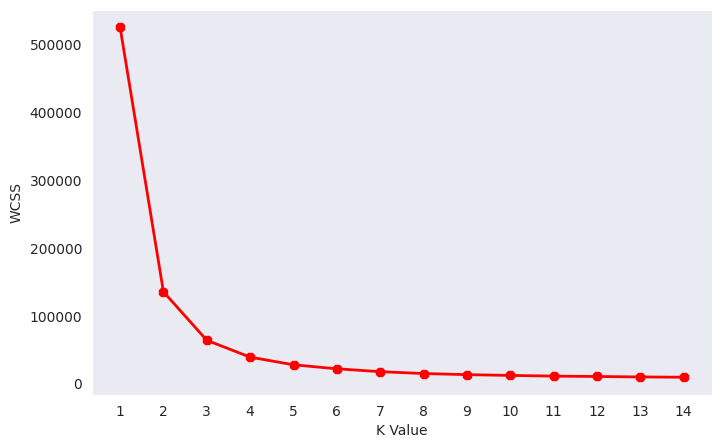

In [18]:
#elbow method
wcss = []
for k in range(1,15):
  kmeans = KMeans(n_clusters=k, init="k-means++")
  kmeans.fit(df_customer.iloc[:,6:])
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.grid()
plt.plot(range(1,15), wcss, linewidth=2, color="red", marker="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,15,1))
plt.ylabel("WCSS")
plt.show()
